<a href="https://colab.research.google.com/github/Steph0088/Team97_DS4A/blob/StephanieJ/NICS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('nics-firearm-background-checks.csv')

In [ ]:
df
#import and preview NICS data

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-05,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,0.0,19.0,...,0.0,0.0,0.0,29.0,15.0,9.0,1.0,0.0,0.0,66937
1,2021-05,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,0.0,1.0,...,0.0,0.0,0.0,12.0,14.0,0.0,0.0,0.0,0.0,7145
2,2021-05,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,0.0,7.0,...,5.0,0.0,0.0,11.0,10.0,1.0,0.0,1.0,0.0,56581
3,2021-05,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,3.0,7.0,...,0.0,0.0,0.0,8.0,8.0,2.0,0.0,0.0,0.0,24206
4,2021-05,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,0.0,11.0,...,129.0,0.0,0.0,8165.0,3024.0,657.0,36.0,12.0,1.0,119739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14900,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14901,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14902,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14903,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [ ]:
#adds year only as new column
df["year_only"] = pd.to_datetime(df['month'])
df["year_only"] = df['year_only'].dt.strftime('%Y')
#adds month only as new column
df["month_only"] = pd.to_datetime(df['month'])
df["month_only"] = df['month_only'].dt.strftime('%m')
df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year_only,month_only
0,2021-05,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,0.0,19.0,...,0.0,29.0,15.0,9.0,1.0,0.0,0.0,66937,2021,05
1,2021-05,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,0.0,1.0,...,0.0,12.0,14.0,0.0,0.0,0.0,0.0,7145,2021,05
2,2021-05,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,0.0,7.0,...,0.0,11.0,10.0,1.0,0.0,1.0,0.0,56581,2021,05
3,2021-05,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,3.0,7.0,...,0.0,8.0,8.0,2.0,0.0,0.0,0.0,24206,2021,05
4,2021-05,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,0.0,11.0,...,0.0,8165.0,3024.0,657.0,36.0,12.0,1.0,119739,2021,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14900,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1998,11
14901,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361,1998,11
14902,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408,1998,11
14903,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,1998,11


In [ ]:
df2=df.drop(['prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other','returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun','return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals','month_only'], axis=1)
#drop unnecessary columns

In [ ]:
df2

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year_only
0,2021-05,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,0.0,1441.0,531.0,14.0,29.0,15.0,9.0,2021
1,2021-05,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,0.0,98.0,57.0,1.0,12.0,14.0,0.0,2021
2,2021-05,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,0.0,765.0,229.0,2.0,11.0,10.0,1.0,2021
3,2021-05,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,3.0,562.0,405.0,1.0,8.0,8.0,2.0,2021
4,2021-05,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,0.0,426.0,245.0,16.0,8165.0,3024.0,657.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14900,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1998
14901,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1998
14902,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1998
14903,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1998


In [ ]:
df2.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other', 'year_only'],
      dtype='object')

In [ ]:
df2["total"]=df2['permit']+df2['permit_recheck']+df2['handgun']+df2['long_gun']+df2['other']+df2['multiple']+df2['admin']+df2['redemption_handgun']+df2['redemption_long_gun']+df2['redemption_other']+df2['private_sale_handgun']+df2['private_sale_long_gun']+df2['private_sale_other']
#create adjusted total to include only NICS for "purchase" (exclude guns returned, etc)

In [ ]:
df2["month"] = pd.to_datetime(df['month'])

In [ ]:
df2.dtypes

month                    datetime64[ns]
state                            object
permit                          float64
permit_recheck                  float64
handgun                         float64
long_gun                        float64
other                           float64
multiple                          int64
admin                           float64
redemption_handgun              float64
redemption_long_gun             float64
redemption_other                float64
private_sale_handgun            float64
private_sale_long_gun           float64
private_sale_other              float64
year_only                         int64
total                           float64
dtype: object

In [ ]:
df2["year_only"]=df2["year_only"].astype(str).astype(int)
#create year as integer to filter

In [ ]:
df_nics = df2[(df2['year_only'] > 2012) &
                              (df2['year_only'] <= 2020)]
#only keep data from 2013-2020

In [ ]:
df_nics

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,redemption_handgun,redemption_long_gun,redemption_other,private_sale_handgun,private_sale_long_gun,private_sale_other,year_only,total
275,2020-12,Alabama,33421.0,505.0,31103.0,28933.0,1855.0,1388,0.0,2447.0,1121.0,9.0,30.0,23.0,5.0,2020,100840.0
276,2020-12,Alaska,441.0,3.0,3658.0,3822.0,430.0,233,0.0,123.0,84.0,1.0,9.0,10.0,1.0,2020,8815.0
277,2020-12,Arizona,9043.0,846.0,25093.0,14562.0,1942.0,1395,0.0,1082.0,349.0,4.0,21.0,8.0,3.0,2020,54348.0
278,2020-12,Arkansas,3878.0,900.0,10987.0,12719.0,587.0,510,9.0,1043.0,935.0,2.0,2.0,14.0,1.0,2020,31587.0
279,2020-12,California,26034.0,1788.0,59909.0,39389.0,6932.0,0,0.0,450.0,273.0,20.0,523.0,27.0,0.0,2020,135345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,2013-01,Virginia,0.0,NaN,34636.0,24775.0,1426.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2013,NaN
5551,2013-01,Washington,22087.0,NaN,28505.0,18241.0,1252.0,778,7.0,1310.0,1352.0,4.0,NaN,NaN,NaN,2013,NaN
5552,2013-01,West Virginia,615.0,NaN,12197.0,10377.0,318.0,597,0.0,957.0,1707.0,1.0,NaN,NaN,NaN,2013,NaN
5553,2013-01,Wisconsin,15439.0,NaN,25154.0,15454.0,593.0,49,0.0,52.0,230.0,0.0,NaN,NaN,NaN,2013,NaN


In [ ]:
df_nics.to_csv(r"nics_data.csv")

In [ ]:
df["gun_total"]=df['handgun']+df['long_gun']+df['other']
df
#only the 3 gun types

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year_only,month_only,gun_total
0,2021-05,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,0.0,19.0,...,29.0,15.0,9.0,1.0,0.0,0.0,66937,2021,05,35421.0
1,2021-05,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,0.0,1.0,...,12.0,14.0,0.0,0.0,0.0,0.0,7145,2021,05,6392.0
2,2021-05,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,0.0,7.0,...,11.0,10.0,1.0,0.0,1.0,0.0,56581,2021,05,31919.0
3,2021-05,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,3.0,7.0,...,8.0,8.0,2.0,0.0,0.0,0.0,24206,2021,05,13995.0
4,2021-05,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,0.0,11.0,...,8165.0,3024.0,657.0,36.0,12.0,1.0,119739,2021,05,71560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14900,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24,1998,11,NaN
14901,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,361,1998,11,NaN
14902,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,408,1998,11,NaN
14903,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241,1998,11,NaN


In [ ]:
df2=df.copy()
df2["gun_total"]=df2['handgun']+df2['long_gun']+df2['other']
df2['gun_total'].dropna(how='all')

0       35421.0
1        6392.0
2       31919.0
3       13995.0
4       71560.0
         ...   
7915    16836.0
7916    14693.0
7917     6996.0
7918    10271.0
7919     2911.0
Name: gun_total, Length: 7920, dtype: float64

In [ ]:
yearly_nics=df2.groupby('year_only')['gun_total'].sum()
yearly_nics

year_only
1998           0.0
1999           0.0
2000           0.0
2001           0.0
2002           0.0
2003           0.0
2004           0.0
2005           0.0
2006           0.0
2007           0.0
2008           0.0
2009     4874102.0
2010     8572946.0
2011     9817492.0
2012    12712011.0
2013    13729076.0
2014    12010877.0
2015    13142748.0
2016    14660146.0
2017    12861729.0
2018    11986943.0
2019    12090003.0
2020    19885221.0
2021     7938098.0
Name: gun_total, dtype: float64

In [ ]:
ex=df.copy()
bystate=ex.groupby('state')['gun_total'].sum()
#gun totals by state

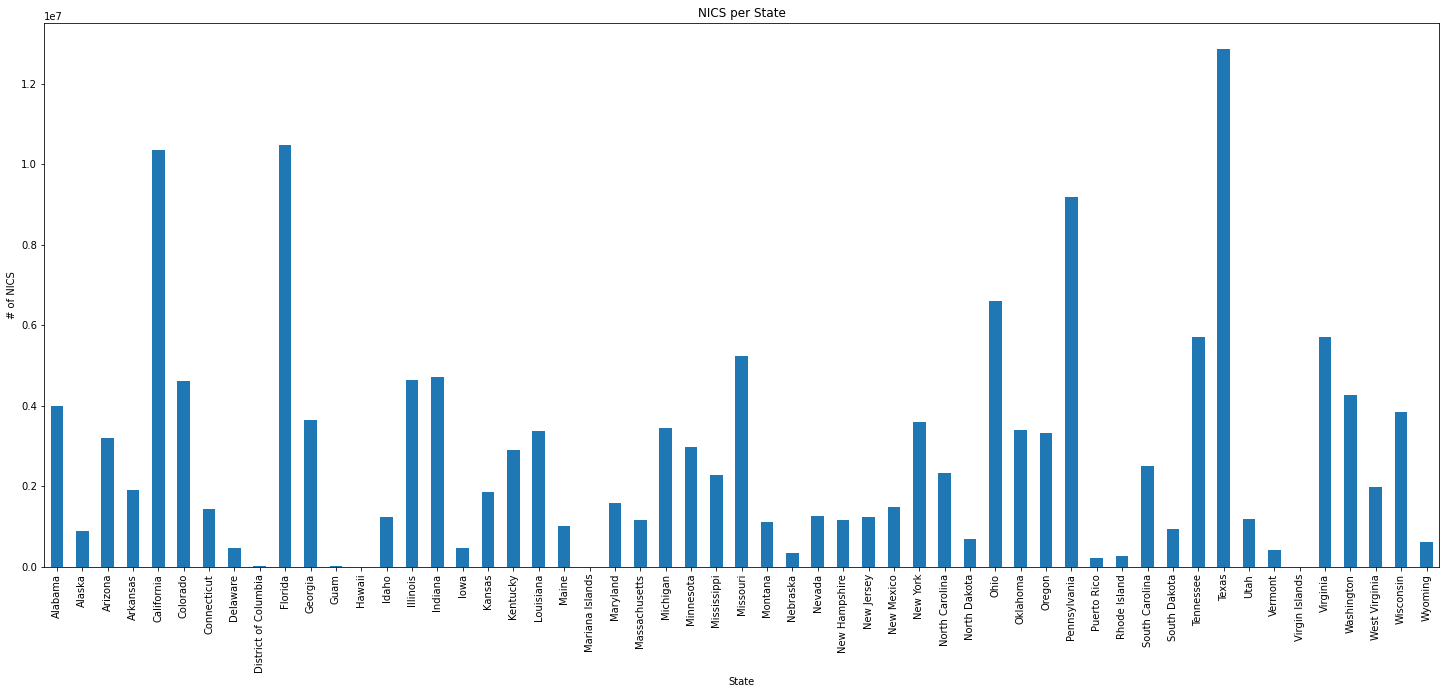

In [ ]:
bystate.plot.bar(xlabel="State",ylabel="# of NICS", title="NICS per State", figsize=(25,10));
#bar plot of the total guns by state

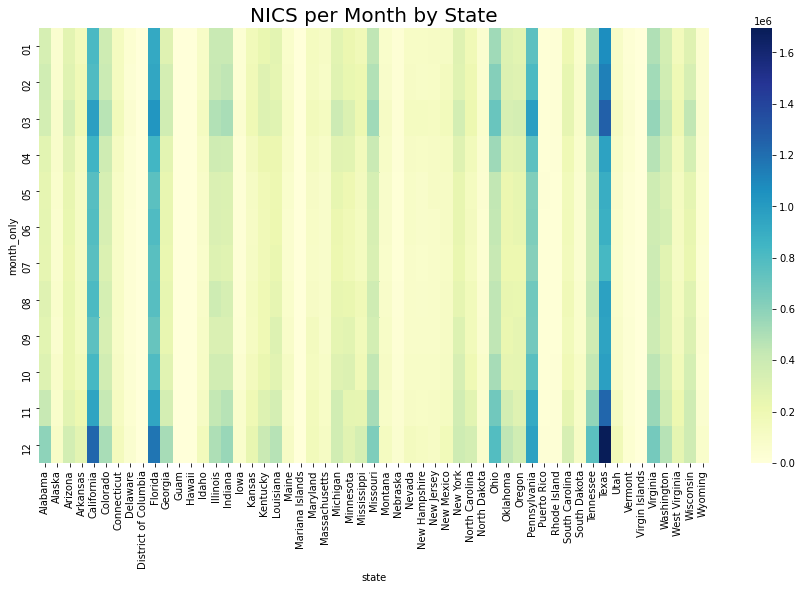

In [ ]:
my_table = pd.pivot_table(data=ex, index="month_only", columns="state",values="gun_total",aggfunc=np.sum,fill_value=0)

plt.subplots(figsize=(15,8))
sns.heatmap(my_table,cmap="YlGnBu");
plt.title("NICS per Month by State", fontsize =20);
#heatmap of NICS per month 1=Jan, 12=Dec 

In [ ]:
gun_type=df.groupby('year_only')[['handgun','long_gun','other']].sum()
gun_type.reset_index()
#showing the NICS by 3 gun types per year

,year_only,handgun,long_gun,other
0,1998,219999.0,582791.0,0.0
1,1999,2536738.0,5217451.0,0.0
2,2000,2191879.0,4779978.0,0.0
3,2001,2167213.0,4943375.0,0.0
4,2002,1845112.0,4409311.0,0.0
5,2003,1851078.0,4383057.0,0.0
6,2004,1990460.0,4506847.0,0.0
7,2005,2241740.0,4584462.0,0.0
8,2006,2441325.0,4789591.0,0.0
9,2007,2635629.0,4570697.0,0.0


In [ ]:
df2.to_csv(r"nics1.csv")

In [ ]:
gun_typesss=df.groupby('year_only')[['handgun','long_gun','other','private_sale_handgun','private_sale_long_gun','private_sale_other']].sum()

In [ ]:
gun_typesss

,handgun,long_gun,other,private_sale_handgun,private_sale_long_gun,private_sale_other
year_only,,,,,,
1998,219999.0,582791.0,0.0,0.0,0.0,0.0
1999,2536738.0,5217451.0,0.0,0.0,0.0,0.0
2000,2191879.0,4779978.0,0.0,0.0,0.0,0.0
2001,2167213.0,4943375.0,0.0,0.0,0.0,0.0
2002,1845112.0,4409311.0,0.0,0.0,0.0,0.0
2003,1851078.0,4383057.0,0.0,0.0,0.0,0.0
2004,1990460.0,4506847.0,0.0,0.0,0.0,0.0
2005,2241740.0,4584462.0,0.0,0.0,0.0,0.0
2006,2441325.0,4789591.0,0.0,0.0,0.0,0.0


In [ ]:
data4=gun_typesss["handgun"]+gun_typesss["private_sale_handgun"]
#combined handguns

In [ ]:
data5=gun_typesss["long_gun"]+gun_typesss["private_sale_long_gun"]
#combined long_guns

In [ ]:
data6=gun_typesss["other"]+gun_typesss["private_sale_other"]
#combined other

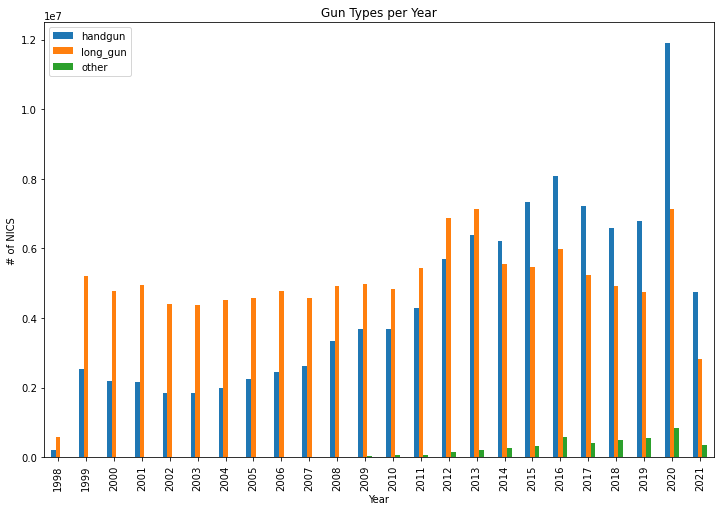

In [ ]:
gun_type.plot.bar(xlabel="Year",ylabel="# of NICS", title="Gun Types per Year", figsize=(12,8));
#multibar plot showing NICS by gun types

Text(0.5, 1.0, 'Boxplot of NICS vs. state')

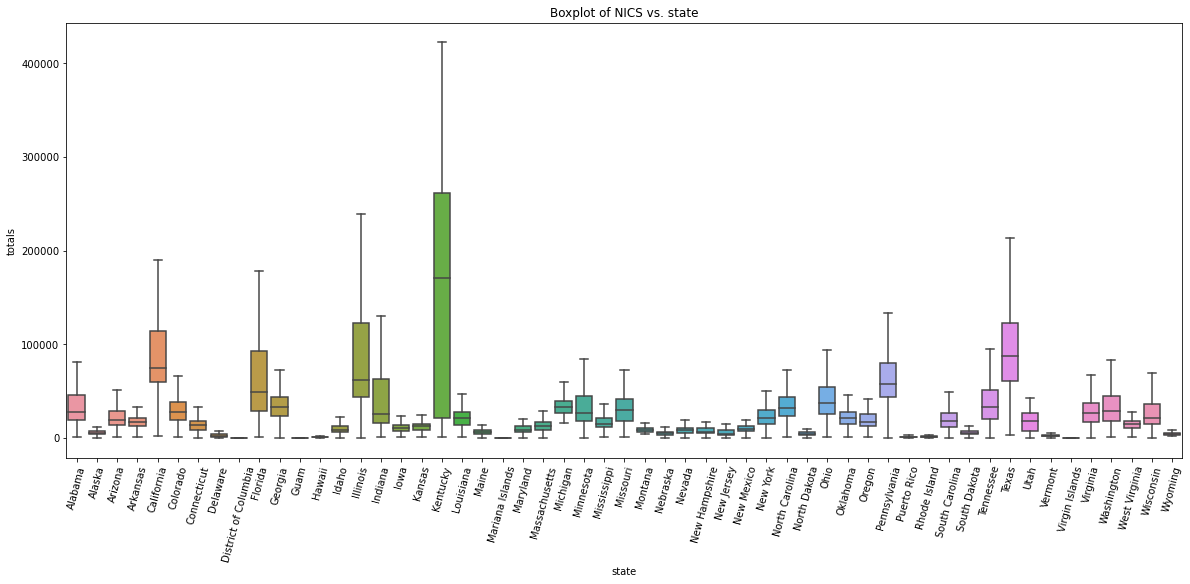

In [ ]:
plt.subplots(figsize=(20,8))
plt.xticks(rotation = 75)
sns.boxplot(x = "state", y='totals', data = df, showfliers=False);
plt.title("Boxplot of NICS vs. state")
#Box plot of NICS per state, aggregated into one year